# Introduction to regression problems with neural networks

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


### Creating some data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# X are features
X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])
# y is the label
y= np.array([3.,6.,9.,12.,15.,18.,21., 24.])

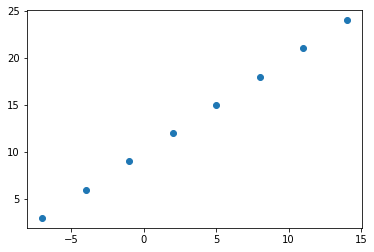

In [4]:
plt.scatter(X,y)

In [5]:
(y == X +10).sum()

8

In [6]:
# Create a demotensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn NumPy array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y= tf.cast(tf.constant(y), dtype = tf.float32)
pred_X = tf.constant([17])

In [11]:
X,y, pred_X

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([17])>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with TensorFlow
1. **Creating a model** (define input, hidden and output layers)
2. **Compiling a model** (define a loss function and an optimizer to reduce the loss)
3. **Fitting a model** ( let the model try to find a pattern between features and labels)

In [13]:
tf.random.set_seed(42)


In [14]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(optimizer="SGD", loss="mae", metrics=["mae"])

# 3. Fit

model.fit(X,y, epochs = 5)



Epoch 1/5
1/1 [==============================] - 0s 1ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 1000us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 0s/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 999us/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 10.9748 - mae: 10.9748


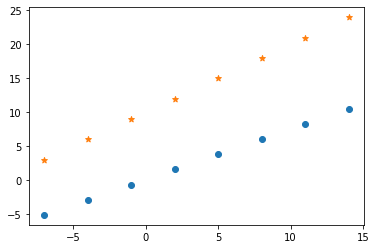

In [15]:
y_pred = model.predict(X)

plt.scatter(X,y_pred)
plt.scatter(X,y, marker='*')

In [16]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
y_pred = model.predict(pred_X)

In [18]:
y_pred

array([[12.716021]], dtype=float32)

# Improving our model
* creating a model -> add more layers, increase the number of neurons, change the activation function
* compiling a model -> change optimization function, learning rate
* fitting a model -> more epochs, more data

1) more epochs

In [19]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(optimizer="SGD", loss="mae", metrics=["mae"])

# 3. Fit

model.fit(X,y, epochs = 100, verbose=0)

In [20]:
pred_value = model.predict(pred_X)
pred_value

array([[29.739855]], dtype=float32)

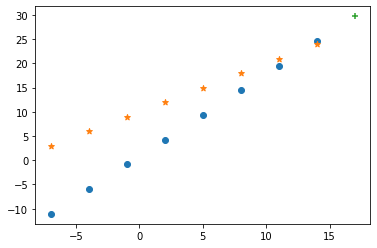

In [21]:
y_pred = model.predict(X)

plt.scatter(X,y_pred)
plt.scatter(X,y, marker = '*')
plt.scatter(pred_X, pred_value, marker = '+')

2. add an additional layer with 5 neurons

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(optimizer="SGD", loss="mae", metrics=["mae"])

# 3. Fit

model.fit(X,y, epochs = 100, verbose=0)

In [23]:
pred_value = model.predict(pred_X)
pred_value

array([[32.40436]], dtype=float32)

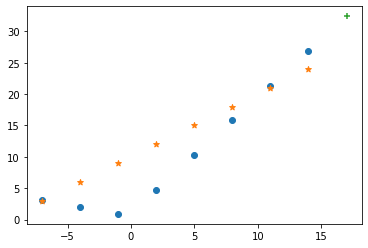

In [24]:
y_pred = model.predict(X)

plt.scatter(X,y_pred)
plt.scatter(X,y, marker = '*')
plt.scatter(pred_X, pred_value, marker = '+')

3. another layer with and increase the neurons in both layers to 5

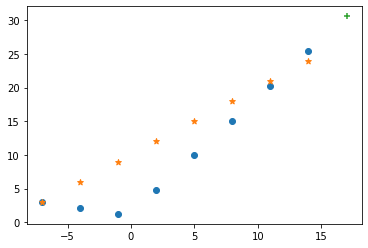

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(optimizer="SGD", loss="mae", metrics=["mae"])

# 3. Fit

model.fit(X,y, epochs = 100, verbose=0)

pred_value = model.predict(pred_X)
pred_value

y_pred = model.predict(X)

plt.scatter(X,y_pred)
plt.scatter(X,y, marker = '*')
plt.scatter(pred_X, pred_value, marker = '+')

3. increase the amount of data

In [26]:
X = np.arange(-10, 100, .5)
y = X+10
X = tf.cast(tf.constant(X), dtype=tf.float32)
y= tf.cast(tf.constant(y), dtype = tf.float32)
pred_X = tf.constant([17])

<tf.Tensor: shape=(), dtype=float32, numpy=27.499973>

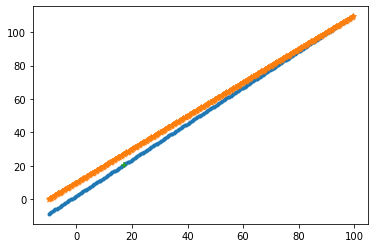

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(optimizer="SGD", loss="mae", metrics=["mae"])

# 3. Fit

model.fit(X,y, epochs = 100, verbose=0)

pred_value = model.predict(pred_X)
pred_value

y_pred = model.predict(X)

plt.scatter(X,y_pred, marker = '.')
plt.scatter(X,y, marker = '*')
plt.scatter(pred_X, pred_value, marker = '+')
tf.reduce_min(tf.metrics.mae(y,y_pred))

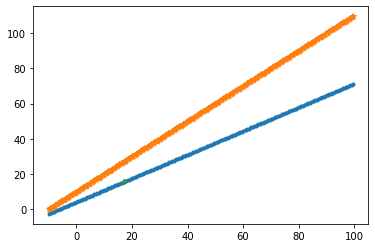

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(optimizer="SGD", loss="mae", metrics=["mae"])

# 3. Fit

model.fit(X,y, epochs = 100, verbose=0)

pred_value = model.predict(pred_X)
pred_value

y_pred = model.predict(X)

plt.scatter(X,y_pred, marker = '.')
plt.scatter(X,y, marker = '*')
plt.scatter(pred_X, pred_value, marker = '+')

In [33]:
#print(tf.argmin(tf.metrics.mae(y,y_pred)))   #soemthings wrong here, numbers make no sense!!!
#print(tf.reduce_min(tf.metrics.mae(y,y_pred)))

tf.Tensor(171, shape=(), dtype=int64)
tf.Tensor(27.500044, shape=(), dtype=float32)


[[26.980034]]


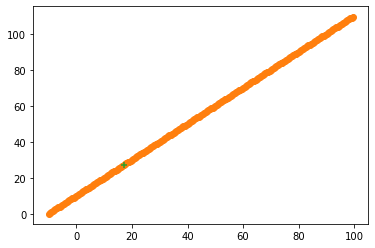

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.04), loss="mae", metrics=["mae"])

# 3. Fit

model.fit(X,y, epochs = 100, verbose=0)

pred_value = model.predict(pred_X)
pred_value

y_pred = model.predict(X)

plt.scatter(X,y_pred, marker = '.')
plt.scatter(X,y)
plt.scatter(pred_X, pred_value, marker = '+')
print(pred_value)
#print(tf.argmin(tf.metrics.mae(y,y_pred)).numpy())
#print(tf.reduce_min(tf.metrics.mae(y,y_pred)).numpy())